# This notebook contains the code for gathering Yellow Taxi Fare Data years 2014-2018

# Dependencies

In [1]:
# Dependencies


#import plotly.plotly as py
#import plotly as py
import pandas as pd
import numpy as np
from IPython.display import display
from IPython.display import Image
import requests
import json
import pprint
import seaborn as sns
import sys
import matplotlib.pyplot as plt
from functools import reduce


# 2014 Yellow Taxi Trip Data

In [2]:
# 2014 Yellow Taxi Trip Data
url2014 = "https://data.cityofnewyork.us/resource/gkne-dk5s.json"

data = url2014

df2014 = pd.read_json(url2014, orient='columns')
df14 = pd.read_json(url2014, orient='columns')
#df.head()
#pd.read_json(url2014, orient='columns').head()

In [3]:
df14 ["year"] =2014

# 2015 Yellow Taxi Trip Data

In [4]:
# 2015 Yellow Taxi Trip Data
url2015 = "https://data.cityofnewyork.us/resource/2yzn-sicd.json"

data = url2015

df2015 = pd.read_json(url2015, orient='columns')
df15 = pd.read_json(url2015, orient='columns')
#df.head()
#pd.read_json(url2015, orient='columns').head()

In [5]:
df15 ["year"] =2015

# 2016 Yellow Taxi Trip Data

In [6]:
# 2016 Yellow Taxi Trip Data
url2016 = "https://data.cityofnewyork.us/resource/uacg-pexx.json"

data = url2016

df2016 = pd.read_json(url2016, orient='columns')
df16 = pd.read_json(url2016, orient='columns')
#df.head()
#pd.read_json(url2016, orient='columns').head()

In [7]:
df16 ["year"] =2016

# 2017 Yellow Taxi Trip Data

In [8]:

# 2017 Yellow Taxi Trip Data
url2017 = "https://data.cityofnewyork.us/resource/biws-g3hs.json"

data = url2017

df2017 = pd.read_json(url2017, orient='columns')
df17 = pd.read_json(url2017, orient='columns')
#df.head()
#pd.read_json(url2017, orient='columns').head()

In [9]:
df17 ["year"] =2017

# 2018 Yellow Taxi Trip Data

In [10]:
# 2018 Yellow Taxi Trip Data
url2018 = "https://data.cityofnewyork.us/resource/t29m-gskq.json"

data = url2018

df2018 = pd.read_json(url2018, orient='columns')
df18 = pd.read_json(url2018, orient='columns')

In [11]:
df18 ["year"] =2018
df18.columns

Index(['dolocationid', 'extra', 'fare_amount', 'improvement_surcharge',
       'mta_tax', 'passenger_count', 'payment_type', 'pulocationid',
       'ratecodeid', 'store_and_fwd_flag', 'tip_amount', 'tolls_amount',
       'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
       'trip_distance', 'vendorid', 'year'],
      dtype='object')

# Inserting common columns in new dataframes

In [12]:
df14_new = df14[['total_amount','fare_amount', 'passenger_count', 'payment_type','tip_amount', 'trip_distance','year']]

In [13]:
df15_new = df15[['total_amount','fare_amount', 'passenger_count', 'payment_type','tip_amount', 'trip_distance','year']]

In [14]:
df16_new = df16[['total_amount','fare_amount', 'passenger_count', 'payment_type','tip_amount', 'trip_distance','year']]

In [15]:
df17_new = df17[['total_amount','fare_amount', 'passenger_count', 'payment_type','tip_amount', 'trip_distance','year']]

In [16]:
df18_new = df18[['total_amount','fare_amount', 'passenger_count', 'payment_type','tip_amount', 'trip_distance','year']]

In [17]:
df_new = pd.concat([df14_new, df15_new,df16_new,df17_new,df18_new])
df_new.count()

total_amount       5000
fare_amount        5000
passenger_count    5000
payment_type       5000
tip_amount         5000
trip_distance      5000
year               5000
dtype: int64

# Grouping columns

In [18]:
grouped_year_df = df_new.groupby(['year'])

In [19]:
grouped_year_df

# avg_fare_amount

In [20]:
grouped_year_avg_fare_amount= grouped_year_df['fare_amount'].mean()
grouped_year_avg_fare_amount

year
2014    12.7875
2015    12.1794
2016    13.0273
2017    14.0555
2018    12.1183
Name: fare_amount, dtype: float64

# avg_passenger_count

In [21]:
grouped_year_avg_passenger_count= grouped_year_df['passenger_count'].mean()
grouped_year_avg_passenger_count

year
2014    1.719
2015    1.629
2016    1.683
2017    1.813
2018    1.607
Name: passenger_count, dtype: float64

# avg_total_amount

In [22]:
grouped_year_avg_total_amount= grouped_year_df['total_amount'].mean()
grouped_year_avg_total_amount

year
2014    15.42316
2015    15.16096
2016    16.29333
2017    17.24120
2018    15.19047
Name: total_amount, dtype: float64

# avg_tip_amount

In [23]:
grouped_year_avg_tip_amount= grouped_year_df['tip_amount'].mean()
grouped_year_avg_tip_amount

year
2014    1.53550
2015    1.63184
2016    1.77655
2017    1.93365
2018    1.67249
Name: tip_amount, dtype: float64

# avg_dist

In [24]:
grouped_year_avg_dist= grouped_year_df['trip_distance'].mean()
grouped_year_avg_dist

year
2014    3.03659
2015    2.80805
2016    3.01568
2017    2.68618
2018    2.79881
Name: trip_distance, dtype: float64

# Combined all to make a new DataFrame

In [25]:
df_year_avg=pd.concat([grouped_year_avg_dist,grouped_year_avg_tip_amount,grouped_year_avg_total_amount,grouped_year_avg_passenger_count,grouped_year_avg_fare_amount],axis=1).reset_index()
df_year_avg

,year,trip_distance,tip_amount,total_amount,passenger_count,fare_amount
0,2014,3.03659,1.53550,15.42316,1.719,12.7875
1,2015,2.80805,1.63184,15.16096,1.629,12.1794
2,2016,3.01568,1.77655,16.29333,1.683,13.0273
3,2017,2.68618,1.93365,17.24120,1.813,14.0555
4,2018,2.79881,1.67249,15.19047,1.607,12.1183


# Ploting the Data

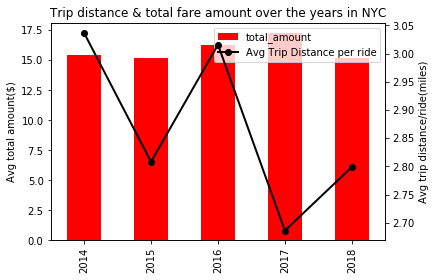

In [26]:
# Plotting multiaxes plot for trip distance and total fare amount for NYC taxis

fig, ax = plt.subplots()
fx=df_year_avg[['total_amount']].plot(kind='bar', stacked=False, title='Trip distance & total fare amount over the years in NYC', 
                           color='red', ax=ax, grid=False,label='Avg total amount per ride')
plt.ylabel("Avg total amount($)")
df_year_avg['year']=df_year_avg['year'].apply(str)

years= (df_year_avg['year'].values)

ax2 = ax.twinx()
ax2.plot(years, df_year_avg[['trip_distance']].values, linestyle='-', marker='o', 
        color='black', linewidth=2.0, label='Avg Trip Distance per ride')
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='best')
ax.yaxis.set_ticks_position("left")

ax2.yaxis.set_ticks_position("right")
plt.ylabel("Avg trip distance/ride(miles)")
# Save the graph as a png
plt.savefig("NYC trip trends.png")

# Preview the figure
plt.show()


In [27]:
#df_year_avg.to_csv(path_or_buf=None, sep=', ', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, compression='infer', quoting=None, quotechar='"', line_terminator=None, chunksize=None, tupleize_cols=None, date_format=None, doublequote=True, escapechar=None, decimal='.')

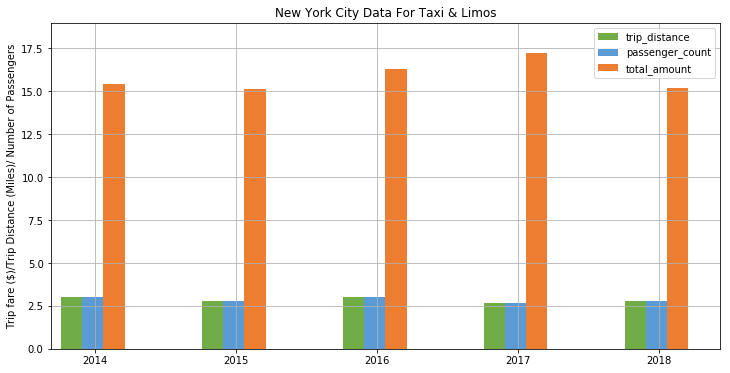

In [28]:

# Setting the positions and width for the bars
pos = list(range(len(df_year_avg['year']))) 
width = 0.15 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(12,6))
#######################################################
# Create a bar with trip_distance data,
# in position pos,
plt.bar(pos, 
        #using df_year_avg['trip_distance'] data,
        df_year_avg['trip_distance'], 
        # of width
        width,  
        # with color
        color='#70AD47', 
        # with label the first value in years
        label=df_year_avg['trip_distance'][0]) 

########################################################

# Create a bar with total_amount data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df_year_avg['total_amount'] data,
        df_year_avg['trip_distance'],
        # of width
        width,  
        # with color
        color='#5B9BD5', 
        # with label the second value in first_name
        label=df_year_avg['trip_distance'][1]) 
##########################################################
# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df_year_avg['fare_amount'] data,
        df_year_avg['total_amount'], 
        # of width
        width, 
        # with color
        color='#ED7D31', 
        # with label the third value in yearstrip_distance
        label=df_year_avg['total_amount'][2]) 
##########################################################



# Set the y axis label
ax.set_ylabel('Trip fare ($)/Trip Distance (Miles)/ Number of Passengers')

# Set the chart's title
ax.set_title('New York City Data For Taxi & Limos')

# Set the position of the x ticks
ax.set_xticks([p + 1.1 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_year_avg['year'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0,19] )

# Adding the legend and showing the plot
plt.legend(['trip_distance', 'passenger_count', 'total_amount'], loc='upper right')
plt.grid()

plt.savefig('Average_New_York_yellow.png')
plt.show()

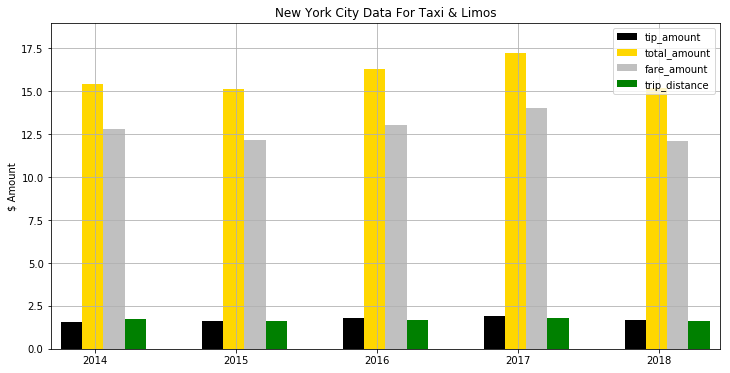

In [29]:

# Setting the positions and width for the bars
pos = list(range(len(df_year_avg['year']))) 
width = 0.15 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(12,6))
#######################################################
# Create a bar with trip_distance data,
# in position pos,
plt.bar(pos, 
        #using df_year_avg['trip_distance'] data,
        df_year_avg['tip_amount'], 
        # of width
        width,  
        # with color
        color='black', 
        # with label the first value in years
        label=df_year_avg['tip_amount'][0]) 

########################################################

# Create a bar with total_amount data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df_year_avg['total_amount'] data,
        df_year_avg['total_amount'],
        # of width
        width,  
        # with color
        color='gold', 
        # with label the second value in first_name
        label=df_year_avg['total_amount'][1]) 
##########################################################
# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using df_year_avg['fare_amount'] data,
        df_year_avg['fare_amount'], 
        # of width
        width, 
        # with color
        color='silver', 
        # with label the third value in yearstrip_distance
        label=df_year_avg['fare_amount'][2]) 
##########################################################
plt.bar([p + width*3 for p in pos], 
        #using df_year_avg['fare_amount'] data,
        df_year_avg['passenger_count'], 
        # of width
        width, 
        # with color
        color='green', 
        # with label the third value in yearstrip_distance
        label=df_year_avg['passenger_count'][3]) 


# Set the y axis label
ax.set_ylabel('$ Amount')

# Set the chart's title
ax.set_title('New York City Data For Taxi & Limos')

# Set the position of the x ticks
ax.set_xticks([p + 1.1 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_year_avg['year'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0,19] )

# Adding the legend and showing the plot
plt.legend(['tip_amount', 'total_amount', 'fare_amount', 'trip_distance','passenger_count'], loc='upper right')
plt.grid()

plt.savefig('Average_New_York_yellow_2.png')
plt.show()

# The above plot indicates:
### 1. Amount of fares has not changed
### 2. Trip distance has not changed
### 3. Tip amount has not changed

## a scatter plot comparing total_amount and tip_amount for 2014

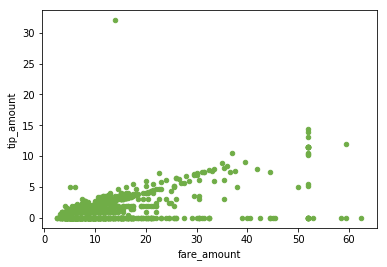

In [30]:
# a scatter plot comparing total_amount and tip_amount
df14_new.plot(kind='scatter',x='fare_amount',y='tip_amount',color='#70AD47')

plt.savefig('fare_amount_2014.png')
plt.show()

# a scatter plot comparing total_amount and tip_amount for 2015

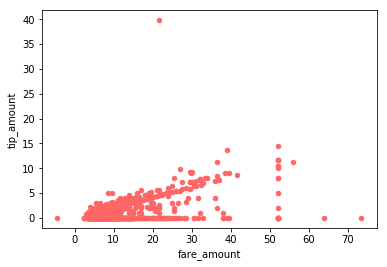

In [31]:
# a scatter plot comparing total_amount and tip_amount
df15_new.plot(kind='scatter',x='fare_amount',y='tip_amount',color='#FF6666')

plt.savefig('fare_amount_2015.png')
plt.show()

### a scatter plot comparing total_amount and tip_amount for 2016

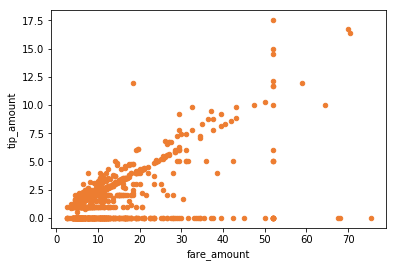

In [32]:
# a scatter plot comparing total_amount and tip_amount
df16_new.plot(kind='scatter',x='fare_amount',y='tip_amount',color='#ED7D31')

plt.savefig('fare_amount_2016.png')
plt.show()

### a scatter plot comparing total_amount and tip_amount for 2017

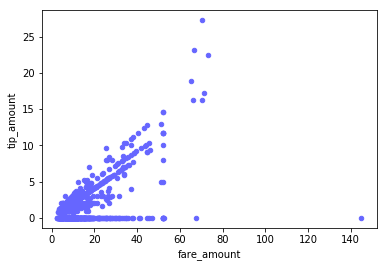

In [33]:
# a scatter plot comparing total_amount and tip_amount
df17_new.plot(kind='scatter',x='fare_amount',y='tip_amount',color='#6666FF')

plt.savefig('fare_amount_2017.png')
plt.show()

### a scatter plot comparing total_amount and tip_amount for 2018

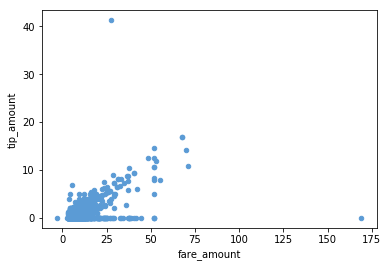

In [34]:
# a scatter plot comparing total_amount and tip_amount
df18_new.plot(kind='scatter',x='fare_amount',y='tip_amount',color='#5B9BD5')

plt.savefig('fare_amount_2018.png')
plt.show()